# Machine Learning: Use cases in FINTECH
- The data for these projects are manufactured fields based on trends found in real-world case studies. The fields describe what companies usually track from their users, and the distributions are based on observed distributions in the real-world analysis. This means that, although the data has been artificially created, the patterns, associations, and distributions are not random.
- The data serves as a good representation of what you may encounter in the workplace. That is, the data is rarely clean, and a lot of pre-processing is needed to get it ready for modeling.
****
# Note on models Building:
The Model Building Process is composed of multiple parts:

- **Plotting with Matplotlib and Seaborn** - A lot of time will be spent on Exploratory Data Analysis (EDA)
- **Data Manipulation** - We will use Pandas and Numpy for all of our data formatting steps.
- **Classification Models** from Sklearn Library (Logistic Regression, Tree, SVM, ...)
- **K-Fold Cross Validation, Grid Search** (Parameter Tuning), and **Feature Selection** algorithms.
*****

# 1. Introduction

Subscription Products often are the main source of revenue for companies across all industries. These products can come in form of an over compassing subscription, or in multi-level memberships. Regardless of how they structure their memberships, or what industry they are in, companies almost always try to minimize customer churn (a.k.a. subscription cancellations). To retain their disengagement with the product.

- **Market:** The target audience is the entirety of a company's subscription base. They are the ones companies want to keep.
- **Product:** The subscription products that customers are already enrolled in can provide value that users may not have imagined, or that they may have forgotten.
- **Goal:** The objective of this model is to predict which users are likely to churn, so that the company can focus on re-engaging these users with the product. These efforts can be email reminders about the benefits of the product, especially focusing on features that are new or that the user has shown to value.
****

# 2. Business Challenge

- In this case study we will be working for a fin-tech company that provides a subscription product to its users, which allows them to manage their bank accounts (savings accounts, credit cards, etc), provides them with personalized coupons, informs them of the latest low-APR loans available in the market, and educates them on the best available methods to save money (like videos on saving money on taxes, free courses on financial health, etc) 
- We are in charge of identifying users who are likely to cancel their subscription so that we start building new features that they may be interested in, these features can increase the engagement and interest of our users towards the product.
****

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("whitegrid")

In [2]:
data = pd.read_csv("data/churn_data.csv")
data.head()

,user,churn,age,housing,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,...,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
0,55409,0,37.0,na,NaN,0,0,0,0,0,...,0,0,0,0,Leo,1,0,NaN,0.00,0
1,23547,0,28.0,R,486.0,0,0,1,0,0,...,0,0,0,0,Leo,0,0,44.0,1.47,1
2,58313,0,35.0,R,561.0,47,2,86,47,0,...,0,0,0,0,Capricorn,1,0,65.0,2.17,0
3,8095,0,26.0,R,567.0,26,3,38,25,0,...,0,0,0,0,Capricorn,0,0,33.0,1.10,1
4,61353,1,27.0,na,NaN,0,0,2,0,0,...,0,0,0,0,Aries,1,0,1.0,0.03,0


# 3. Data

- By subscribing to the membership, our customers have provided us with data on their finances, as well as how they handle those finances through the product. We also have some demographic information we acquired from them during the sign-up process.
- Financial data can often be unreliable and delayed. As a result, companies can sometimes build their marketing models using only demographic data, and data related to finances handled through the product itself. Therefore, we will be restricting ourselves to only using that type of data. Furthermore, product-related data is more indicative of what new features we should be creating as a company.
****

In [3]:
data.columns

Index(['user', 'churn', 'age', 'housing', 'credit_score', 'deposits',
       'withdrawal', 'purchases_partners', 'purchases', 'cc_taken',
       'cc_recommended', 'cc_disliked', 'cc_liked', 'cc_application_begin',
       'app_downloaded', 'web_user', 'app_web_user', 'ios_user',
       'android_user', 'registered_phones', 'payment_type', 'waiting_4_loan',
       'cancelled_loan', 'received_loan', 'rejected_loan', 'zodiac_sign',
       'left_for_two_month_plus', 'left_for_one_month', 'rewards_earned',
       'reward_rate', 'is_referred'],
      dtype='object')

# 4. Exploratory Data Analysis (EDA)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27000 entries, 0 to 26999
Data columns (total 31 columns):
user                       27000 non-null int64
churn                      27000 non-null int64
age                        26996 non-null float64
housing                    27000 non-null object
credit_score               18969 non-null float64
deposits                   27000 non-null int64
withdrawal                 27000 non-null int64
purchases_partners         27000 non-null int64
purchases                  27000 non-null int64
cc_taken                   27000 non-null int64
cc_recommended             27000 non-null int64
cc_disliked                27000 non-null int64
cc_liked                   27000 non-null int64
cc_application_begin       27000 non-null int64
app_downloaded             27000 non-null int64
web_user                   27000 non-null int64
app_web_user               27000 non-null int64
ios_user                   27000 non-null int64
android_user          

In [5]:
pd.set_option("display.float", "{:.2f}".format)
data.describe()

,user,churn,age,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,...,registered_phones,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
count,27000.00,27000.00,26996.00,18969.00,27000.00,27000.00,27000.00,27000.00,27000.00,27000.00,...,27000.00,27000.00,27000.00,27000.00,27000.00,27000.00,27000.00,23773.00,27000.00,27000.00
mean,35422.70,0.41,32.22,542.94,3.34,0.31,28.06,3.27,0.07,92.63,...,0.42,0.00,0.02,0.02,0.00,0.17,0.02,29.11,0.91,0.32
std,20321.01,0.49,9.96,61.06,9.13,1.06,42.22,8.95,0.44,88.87,...,0.91,0.04,0.14,0.13,0.07,0.38,0.13,21.97,0.75,0.47
min,1.00,0.00,17.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
25%,17810.50,0.00,25.00,507.00,0.00,0.00,0.00,0.00,0.00,10.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,9.00,0.20,0.00
50%,35749.00,0.00,30.00,542.00,0.00,0.00,9.00,0.00,0.00,65.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,25.00,0.78,0.00
75%,53244.25,1.00,37.00,578.00,1.00,0.00,43.00,1.00,0.00,164.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,48.00,1.53,1.00
max,69658.00,1.00,91.00,838.00,65.00,29.00,1067.00,63.00,29.00,522.00,...,5.00,1.00,1.00,1.00,1.00,1.00,1.00,114.00,4.00,1.00


In [6]:
data.isnull().sum()

user                          0
churn                         0
age                           4
housing                       0
credit_score               8031
deposits                      0
withdrawal                    0
purchases_partners            0
purchases                     0
cc_taken                      0
cc_recommended                0
cc_disliked                   0
cc_liked                      0
cc_application_begin          0
app_downloaded                0
web_user                      0
app_web_user                  0
ios_user                      0
android_user                  0
registered_phones             0
payment_type                  0
waiting_4_loan                0
cancelled_loan                0
received_loan                 0
rejected_loan                 0
zodiac_sign                   0
left_for_two_month_plus       0
left_for_one_month            0
rewards_earned             3227
reward_rate                   0
is_referred                   0
dtype: i

`age`,`rewards_earned`, and `credit_score` have missing values.

In [7]:
data.dropna(inplace=True)
data.shape

(17779, 31)

### Non Numerical Features

In [8]:
non_num_features = []
for column in data.columns:
    if data[column].dtype == object:
        non_num_features.append(column)
non_num_features

['housing', 'payment_type', 'zodiac_sign']

### Categorical Feature

In [9]:
categorical_col = []
for column in data.columns:
    if len(data[column].unique()) <= 20:
        categorical_col.append(column)
        
categorical_col

['churn',
 'housing',
 'cc_taken',
 'cc_disliked',
 'cc_liked',
 'app_downloaded',
 'web_user',
 'app_web_user',
 'ios_user',
 'android_user',
 'registered_phones',
 'payment_type',
 'waiting_4_loan',
 'cancelled_loan',
 'received_loan',
 'rejected_loan',
 'zodiac_sign',
 'left_for_two_month_plus',
 'left_for_one_month',
 'is_referred']

# 5. Data Visualization

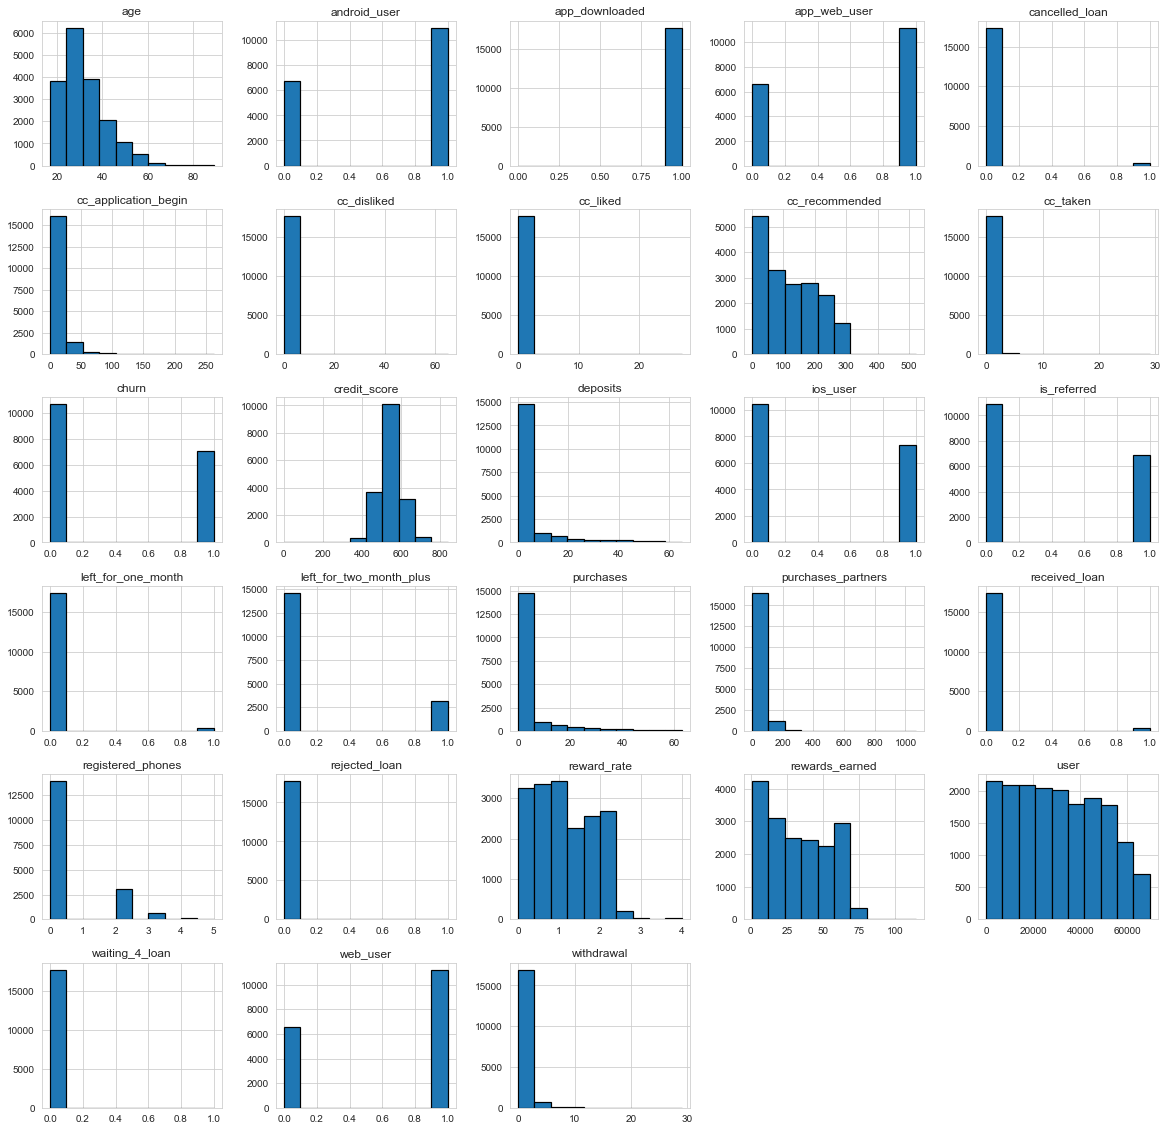

In [10]:
data.hist(edgecolor='black', linewidth=1.2, figsize=(20, 20));

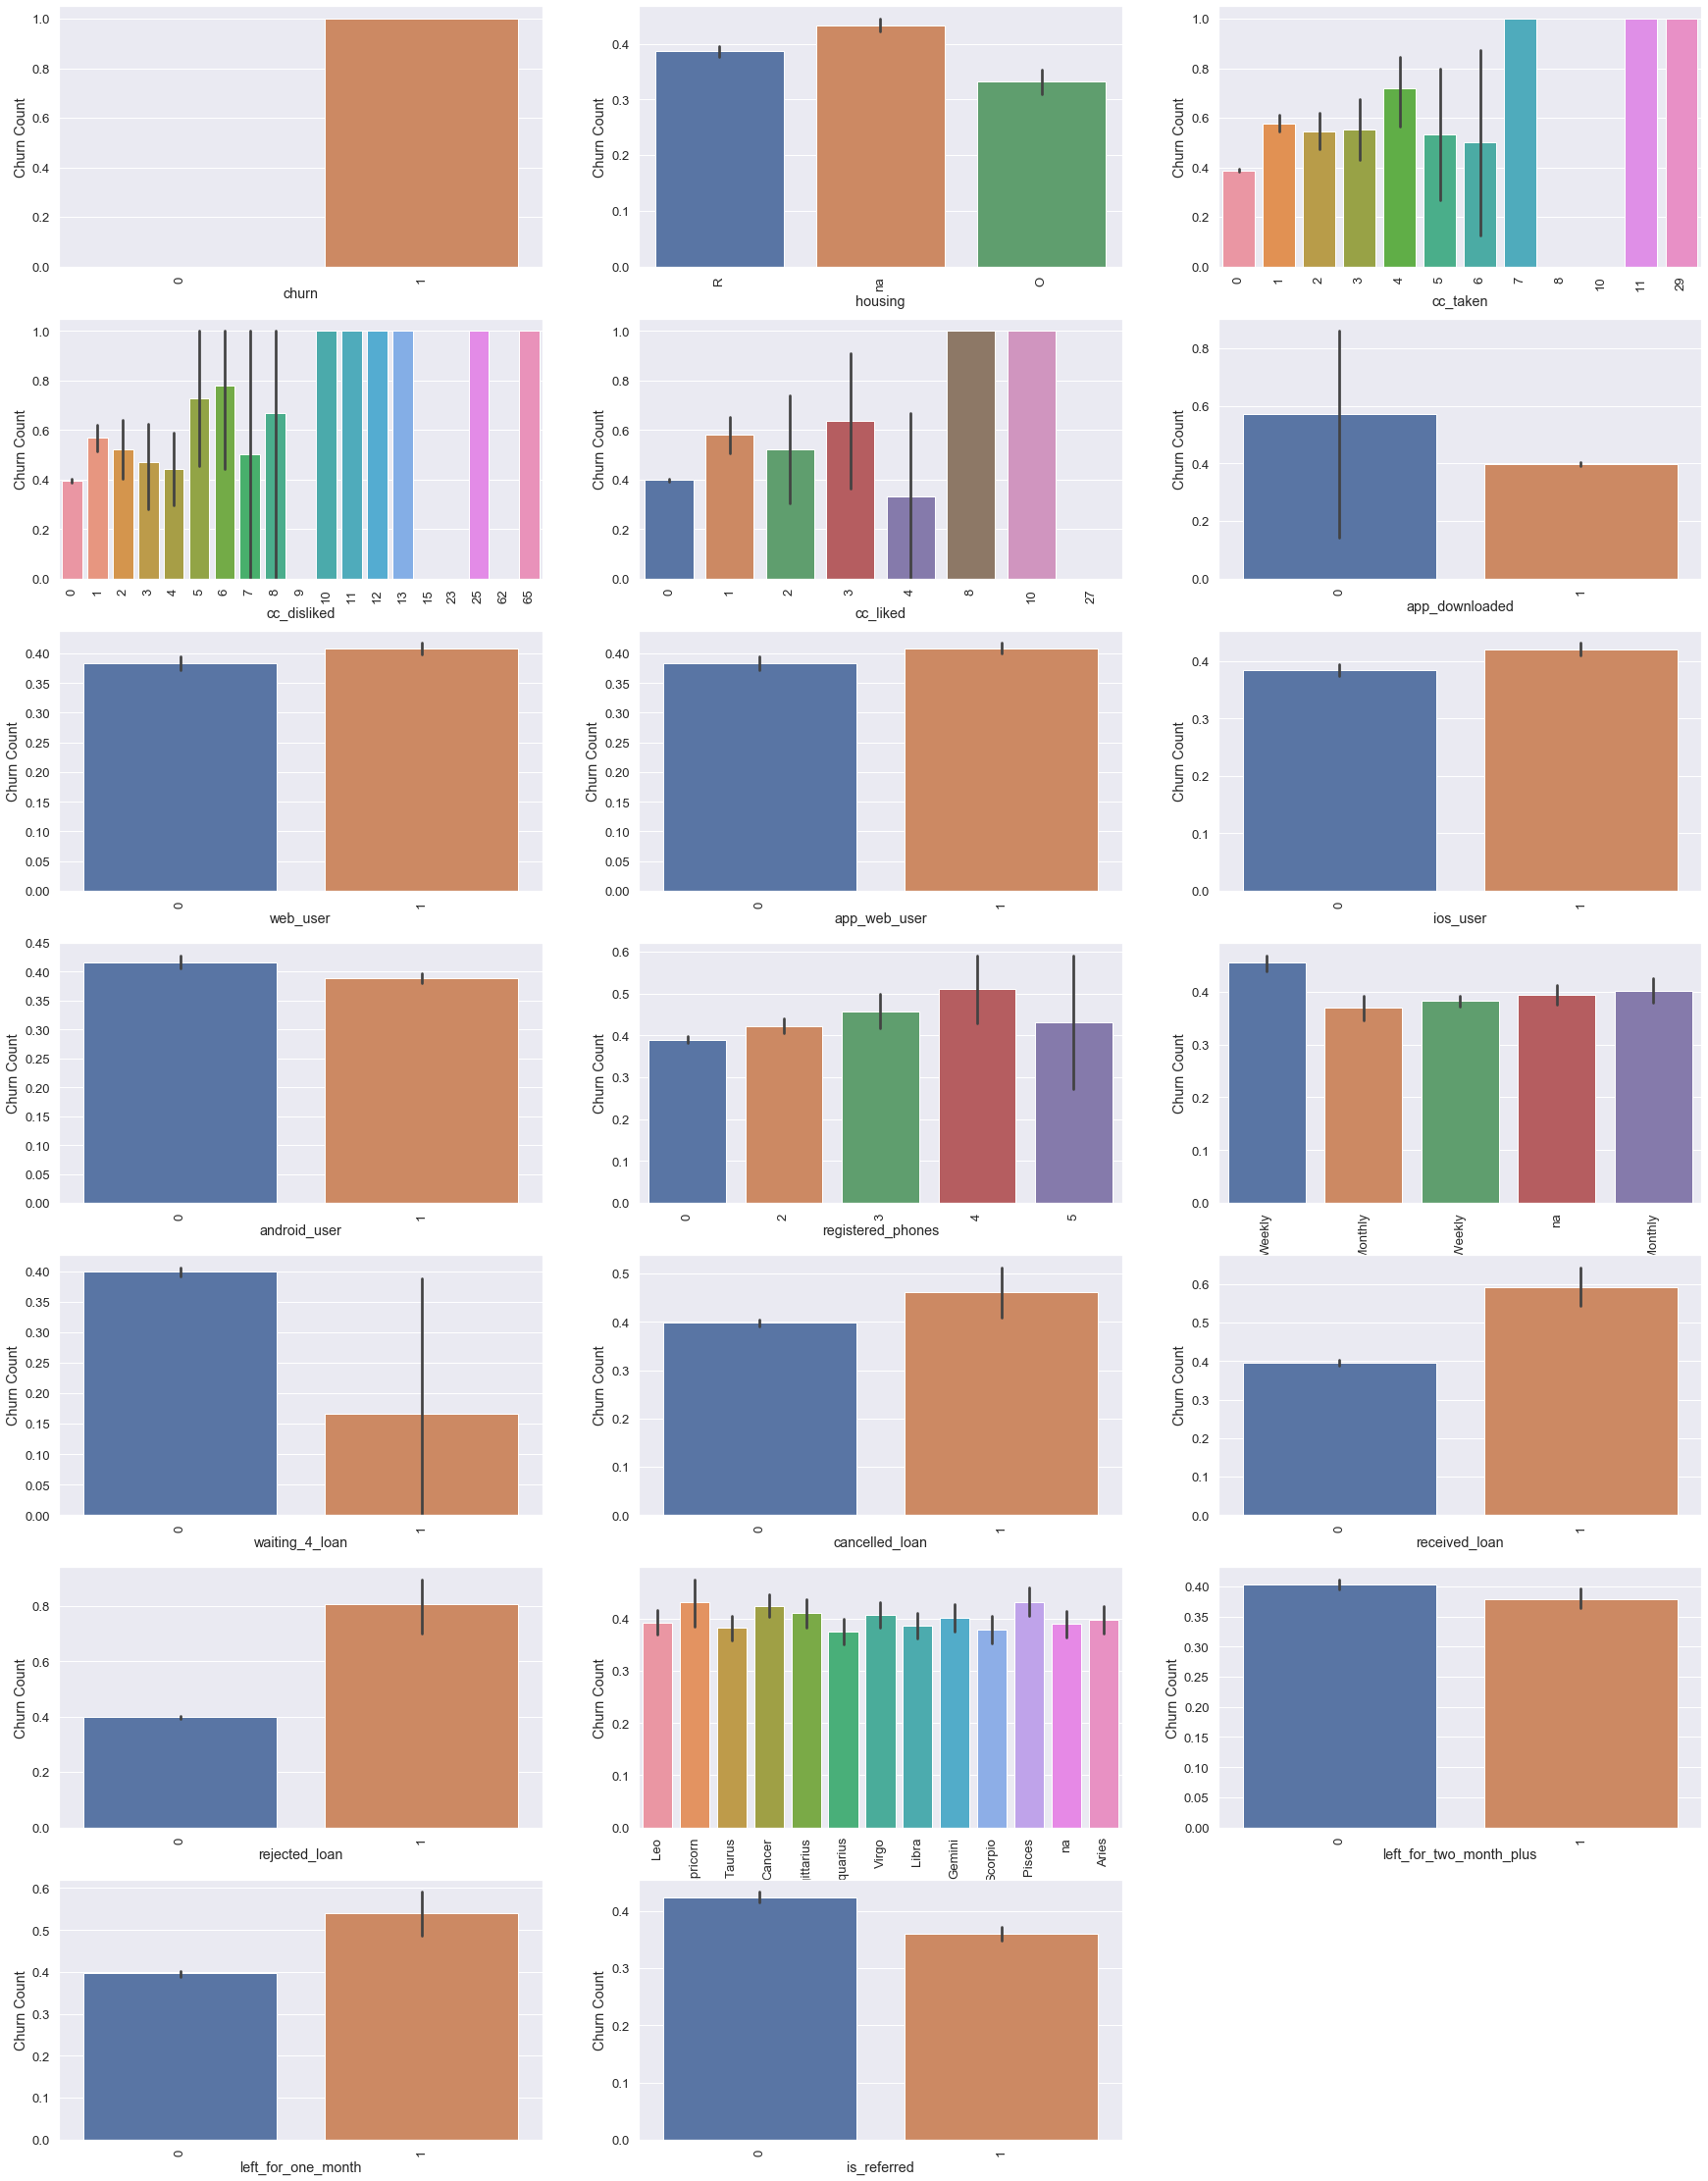

In [18]:
# Plotting how every feature correlate with the "target"
sns.set(font_scale=1.2)
plt.figure(figsize=(30, 40))

for i, column in enumerate(categorical_col, 1):
    plt.subplot(7, 3, i)
    g = sns.barplot(x=f"{column}", y='churn', data=data)
    g.set_xticklabels(g.get_xticklabels(), rotation=90)
    plt.ylabel('Churn Count')
    plt.xlabel(f'{column}')

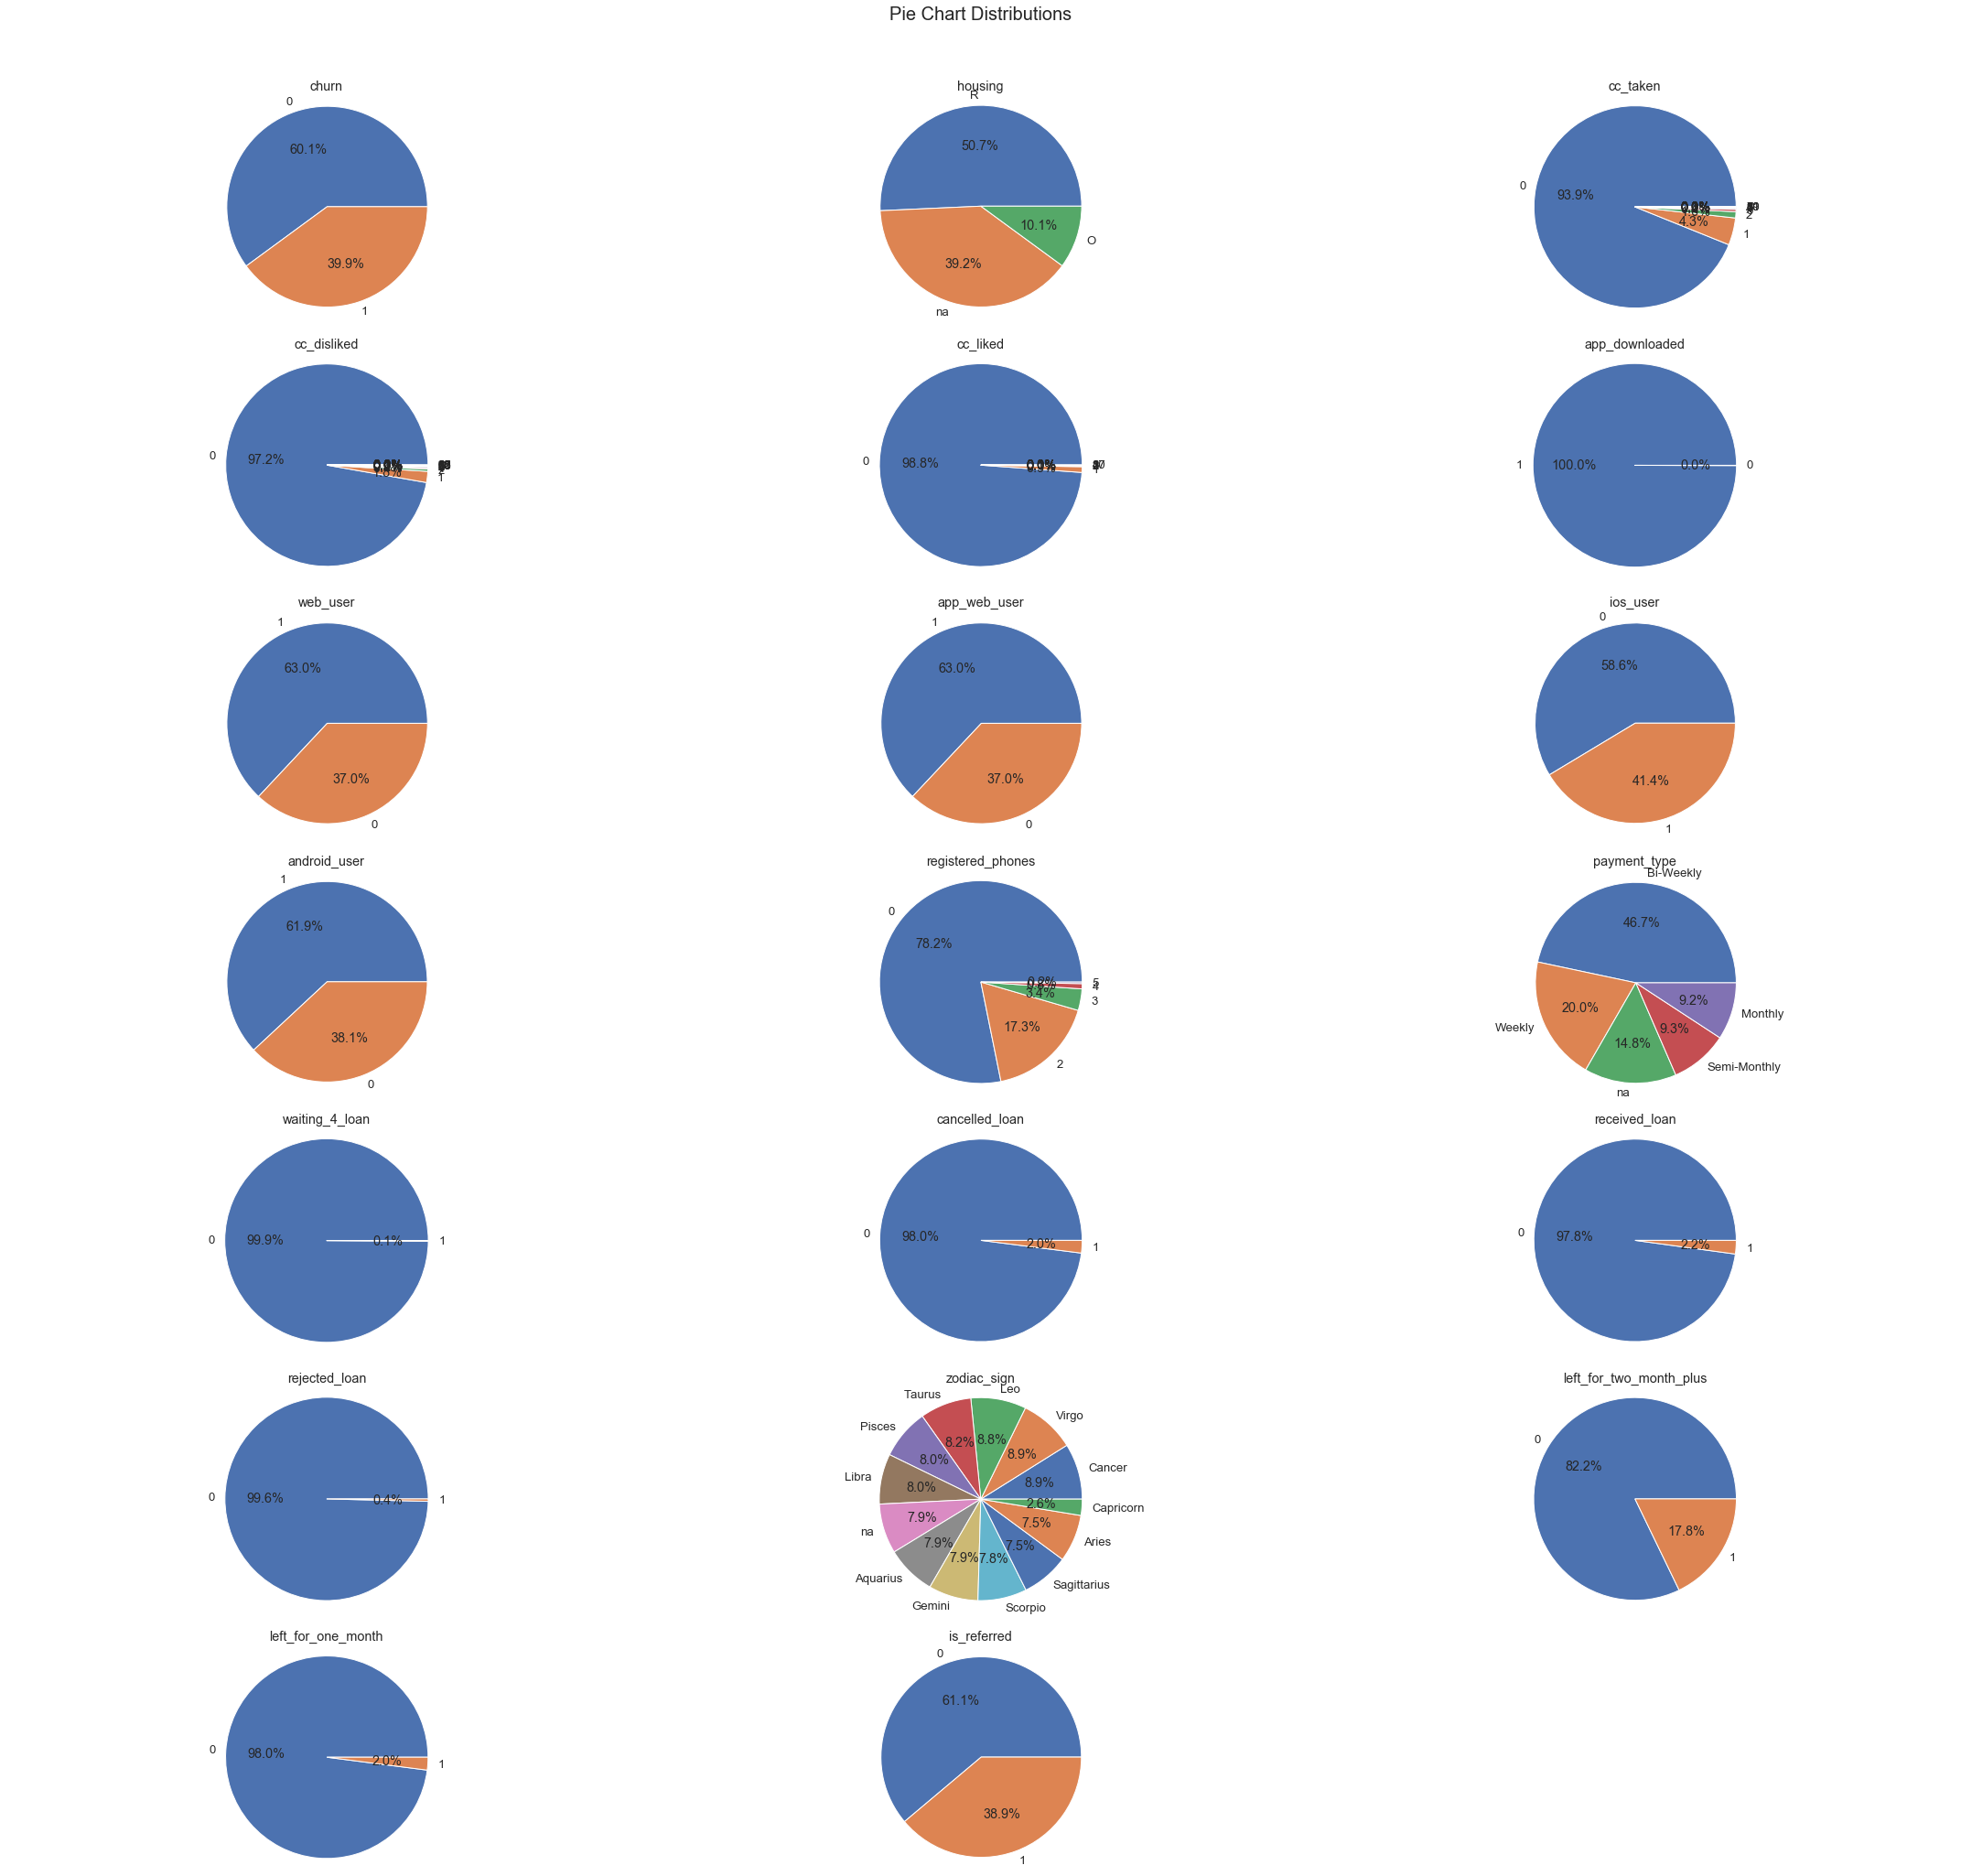

In [30]:
fig = plt.figure(figsize=(30, 30))
plt.suptitle('Pie Chart Distributions', fontsize=20)
for i, column in enumerate(categorical_col, 1) :
    plt.subplot(7, 3, i)
    f = plt.gca()
    f.axes.get_yaxis().set_visible(False)
    f.set_title(f"{column}")
   
    values = data[column].value_counts(normalize = True).values
    index = data[column].value_counts(normalize = True).index
    plt.pie(values, labels = index, autopct='%1.1f%%', radius=4)
    plt.axis('equal')
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

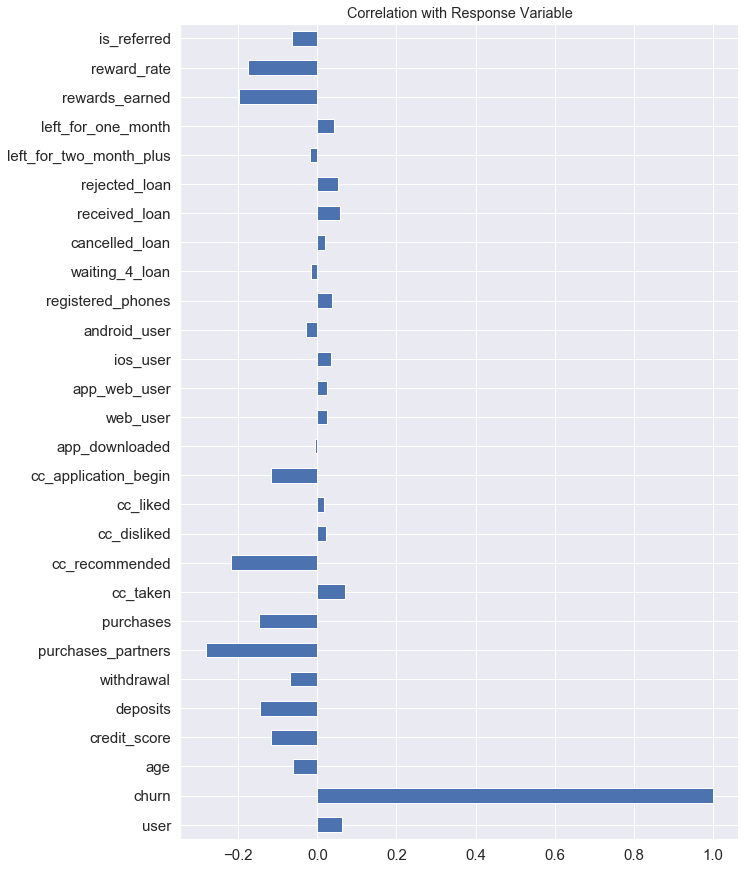

In [41]:
data.corrwith(data.churn).plot.barh(figsize=(10, 15), 
                                   title='Correlation with Response Variable',
                                   fontsize=15, grid=True)

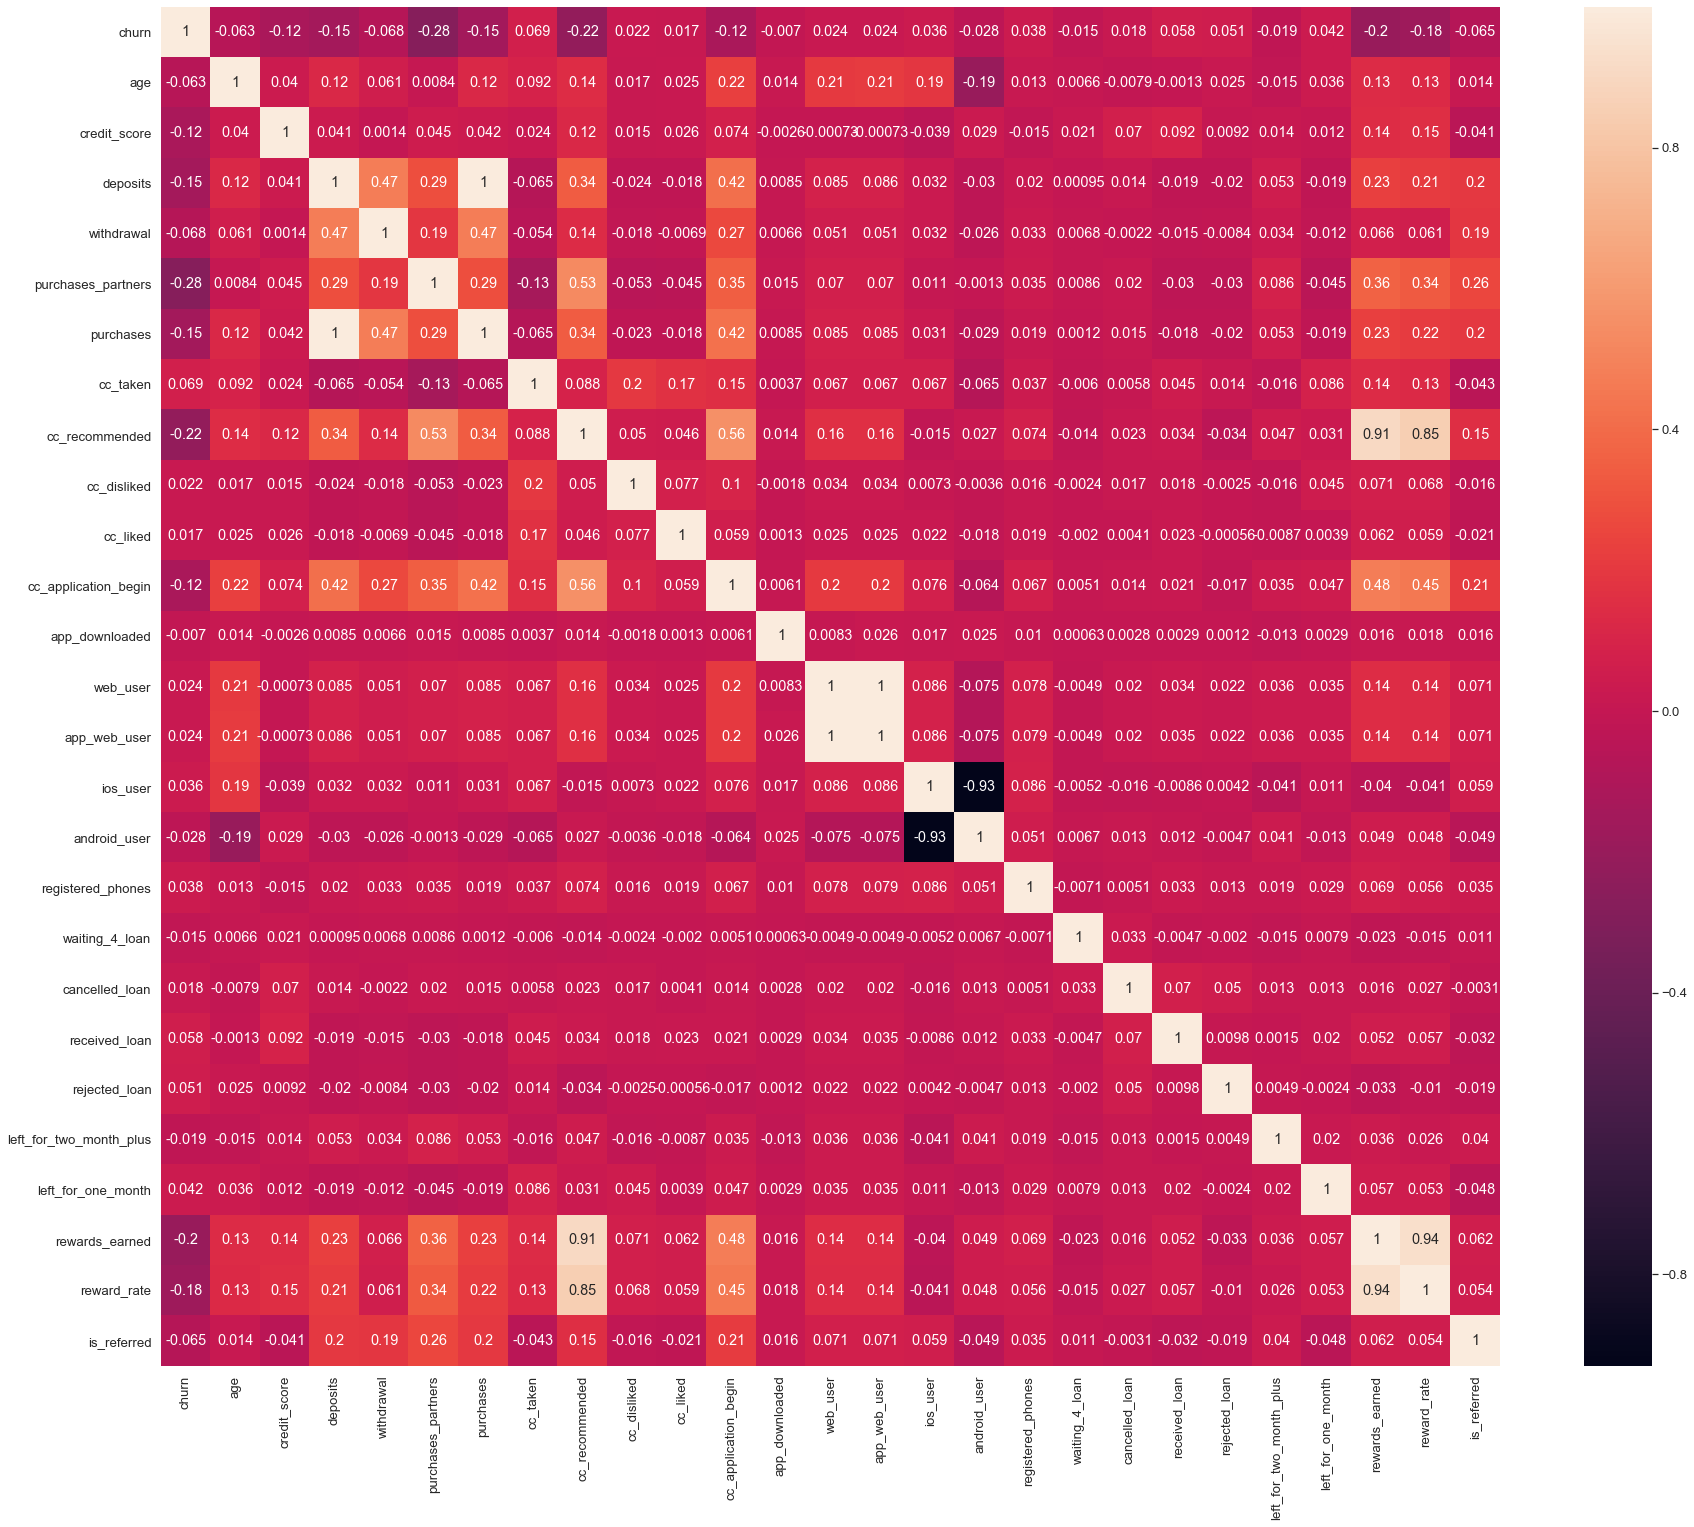

In [42]:
plt.figure(figsize=(30, 25))
sns.heatmap(data.drop('user', axis=1).corr(), annot=True)